<a href="https://colab.research.google.com/github/khinkhinkhant112316/Corn-Diseases-Classification/blob/main/test50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Import libraries
import warnings
warnings.simplefilter(action='ignore')
import os
import zipfile
from shutil import copyfile
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


import tensorflow as tf
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **Load the Dataset**

- Load and extract the dataset
- Create train and test files
- Split and assign the data into train, validation and test folders(80:10:10)
- Display some images

In [2]:
## Conection with Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Load and extract the dataset
input_path = "/content/drive/MyDrive/dataset50/corndisease.zip"

local_zip = input_path
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/dataset50')
zip_ref.close()

In [5]:
extrac_path = '/content/drive/MyDrive/dataset50/corndisease/'

for set_ in ['PLANT_~2']:
    n_blight = len(os.listdir(extrac_path+set_ + '/Blight'))
    n_common_rust = len(os.listdir(extrac_path+set_ + '/Common_Rust'))
    n_gray_leaf_spot = len(os.listdir(extrac_path+set_ + '/Gray_Leaf_Spot'))
    n_health = len(os.listdir(extrac_path+set_ + '/Healthy'))
    print('blight images: {}, common rust images: {}, gray leaf spot images: {}, healt images:{}'.format(n_blight,
                                                                                                         n_common_rust,
                                                                                                         n_gray_leaf_spot,
                                                                                                         n_health))

blight images: 985, common rust images: 1192, gray leaf spot images: 513, healt images:1162


In [6]:
import os

# Define the base directory
base_dir = '/content/drive/MyDrive/dataset50/corndisease/PLANT_~2'

# Define the directories to be created
directories = [
    base_dir,
    os.path.join(base_dir, 'train'),
    os.path.join(base_dir, 'train', 'Blight'),
    os.path.join(base_dir, 'train', 'Common_Rust'),
    os.path.join(base_dir, 'train', 'Gray_Leaf_Spot'),
    os.path.join(base_dir, 'train', 'Healthy'),
    os.path.join(base_dir, 'val'),
    os.path.join(base_dir, 'val', 'Blight'),
    os.path.join(base_dir, 'val', 'Common_Rust'),
    os.path.join(base_dir, 'val', 'Gray_Leaf_Spot'),
    os.path.join(base_dir, 'val', 'Healthy'),
    os.path.join(base_dir, 'test'),
    os.path.join(base_dir, 'test', 'Blight'),
    os.path.join(base_dir, 'test', 'Common_Rust'),
    os.path.join(base_dir, 'test', 'Gray_Leaf_Spot'),
    os.path.join(base_dir, 'test', 'Healthy')
]

try:
    for directory in directories:
        os.makedirs(directory, exist_ok=True)
    print("Directories created successfully.")
except OSError as e:
    print(f"An error occurred: {e}")


Directories created successfully.


In [7]:
#Split and assign the data into train and test files(80:20)
def split_data(SOURCE, TRAINING, VALIDATION, TESTING):

    all_files = []

    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))

    n_files = len(all_files)
    split_point_1 = round(n_files * 0.8)
    split_point_2 = round(n_files * 0.9)

    shuffled = random.sample(all_files, n_files)

    train_set = shuffled[:split_point_1]
    val_set = shuffled[split_point_1:split_point_2]
    test_set = shuffled[split_point_2:]

    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)

    for file_name in val_set:
        copyfile(SOURCE + file_name, VALIDATION + file_name)

    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

Blight_SOURCE_DIR = '/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/Blight/'
Common_Rust_SOURCE_DIR = '/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/Common_Rust/'
Gray_Leaf_Spot_SOURCE_DIR = '/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/Gray_Leaf_Spot/'
Healthy_SOURCE_DIR = '/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/Healthy/'

TRAINING_Blight_DIR = '/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/train/Blight/'
TRAINING_Common_Rust_DIR ='/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/train/Common_Rust/'
TRAINING_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/train/Gray_Leaf_Spot/'
TRAINING_Healthy_DIR ='/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/train/Healthy/'

VALIDATION_Blight_DIR = '/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/val/Blight/'
VALIDATION_Common_Rust_DIR ='/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/val/Common_Rust/'
VALIDATION_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/val/Gray_Leaf_Spot/'
VALIDATION_Healthy_DIR ='/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/val/Healthy/'

TESTING_Blight_DIR = '/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/test/Blight/'
TESTING_Common_Rust_DIR ='/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/test/Common_Rust/'
TESTING_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/test/Gray_Leaf_Spot/'
TESTING_Healthy_DIR ='/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/test/Healthy/'


split_data(Blight_SOURCE_DIR, TRAINING_Blight_DIR, VALIDATION_Blight_DIR, TESTING_Blight_DIR)
split_data(Common_Rust_SOURCE_DIR, TRAINING_Common_Rust_DIR, VALIDATION_Common_Rust_DIR, TESTING_Common_Rust_DIR)
split_data(Gray_Leaf_Spot_SOURCE_DIR,TRAINING_Gray_Leaf_Spot_DIR, VALIDATION_Gray_Leaf_Spot_DIR, TESTING_Gray_Leaf_Spot_DIR)
split_data(Healthy_SOURCE_DIR,TRAINING_Healthy_DIR, VALIDATION_Healthy_DIR, TESTING_Healthy_DIR)

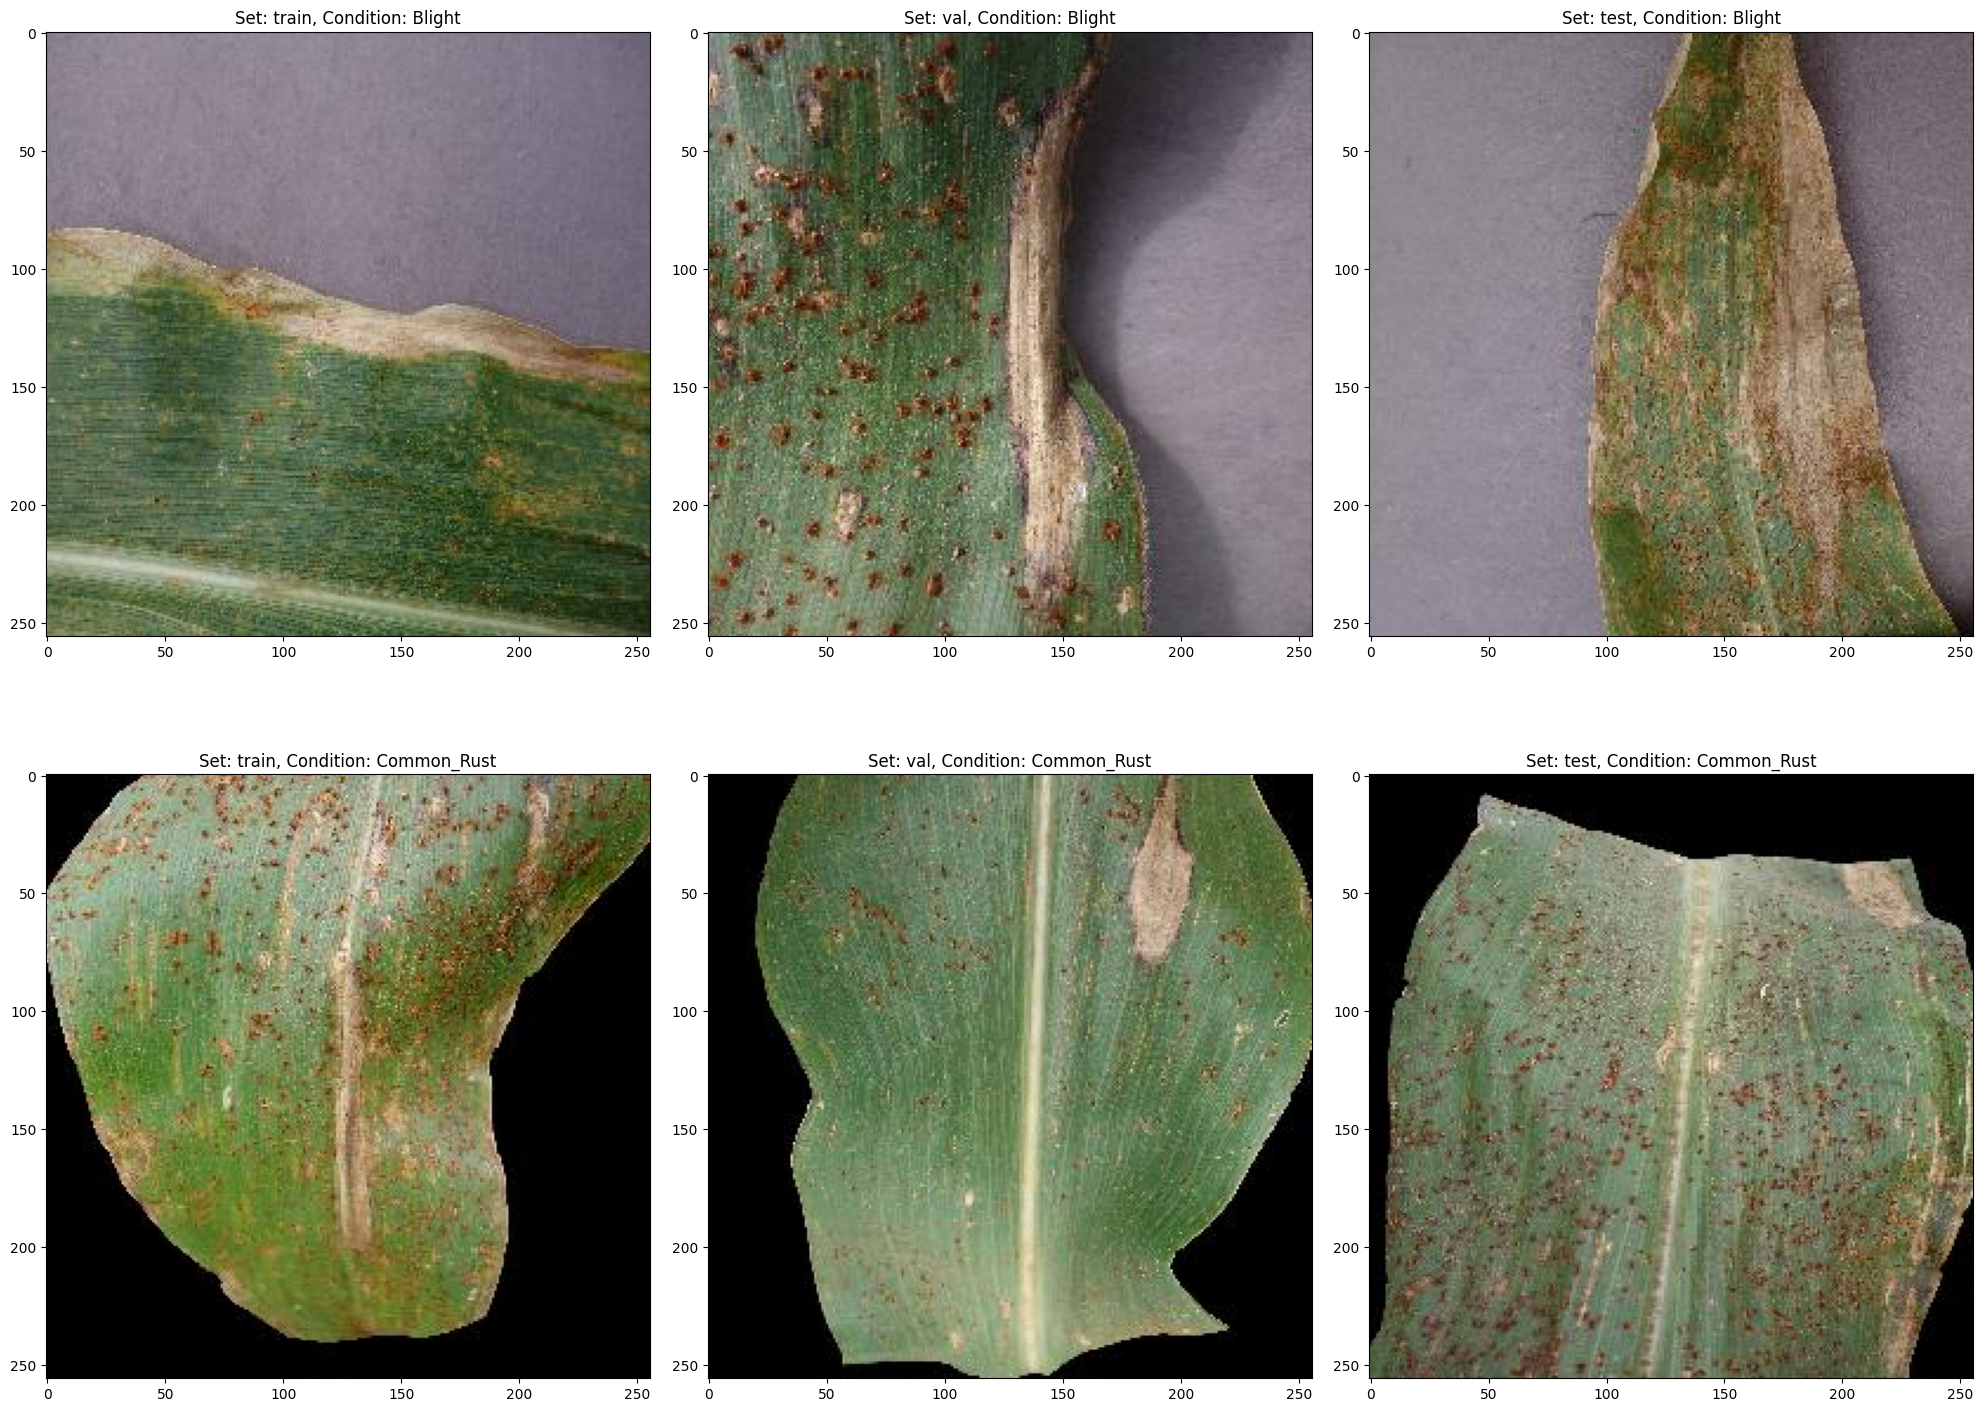

In [8]:
##
path_ = '/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/'

fig, ax = plt.subplots(2,3,figsize=(20,15))
ax = ax.ravel()
plt.tight_layout()

for i, set_ in enumerate(['train','val', 'test']):
    set_path = path_+ set_
    ax[i].imshow(plt.imread(set_path+'/Blight/'+os.listdir(set_path+'/Blight')[0]))
    ax[i].set_title('Set: {}, Condition: Blight'.format(set_))
    ax[i+3].imshow(plt.imread(set_path+'/Common_Rust/'+os.listdir(set_path+'/Common_Rust')[0]))
    ax[i+3].set_title('Set: {}, Condition: Common_Rust'.format(set_))

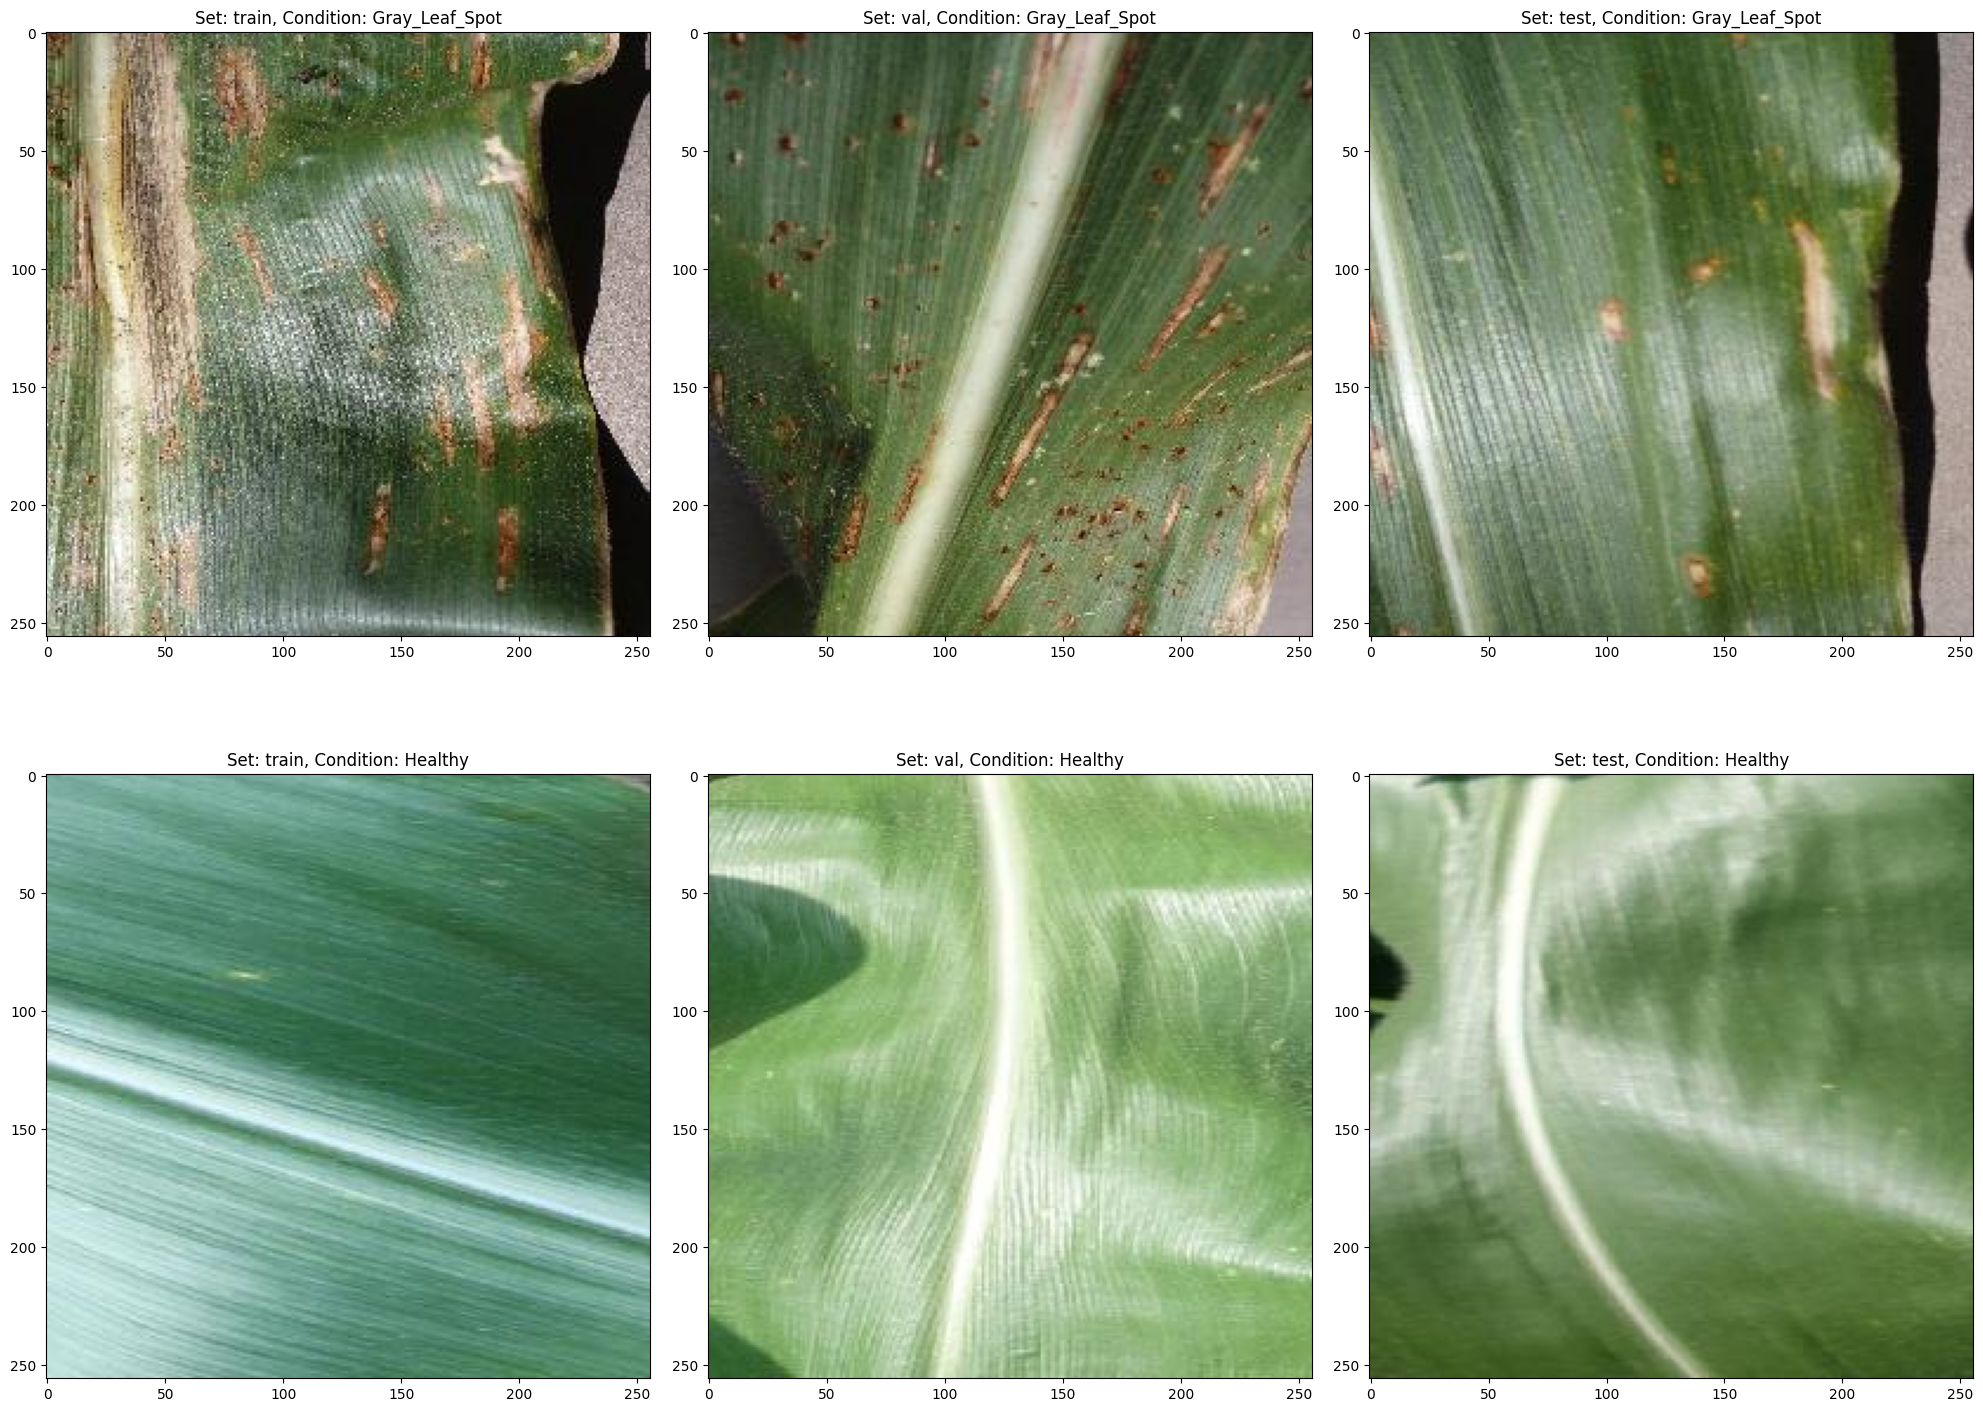

In [9]:
fig, ax = plt.subplots(2,3,figsize=(20,15))
ax = ax.ravel()
plt.tight_layout()

for i, set_ in enumerate(['train','val','test']):
    set_path = path_+ set_
    ax[i].imshow(plt.imread(set_path+'/Gray_Leaf_Spot/'+os.listdir(set_path+'/Gray_Leaf_Spot')[0]))
    ax[i].set_title('Set: {}, Condition: Gray_Leaf_Spot'.format(set_))
    ax[i+3].imshow(plt.imread(set_path+'/Healthy/'+os.listdir(set_path+'/Healthy')[0]))
    ax[i+3].set_title('Set: {}, Condition: Healthy'.format(set_))

## **Data preprocessing**

- Split data into train and test set
- Data normalization[0,1]
- Data augmentation using saveral techniques such as:
  - image flipping
  - zoom
  - shear
  - width and height shift
  - image rotation
  - Image brightness range
  - Featurewise center
  - Featurewise std normalization
  
Note: the techniques of data augmentation were implemented using ImageDataGenerator from Keras.

In [21]:
def train_val_test_data(img_dims, batch_size):

  ## Training data
  train_datagen = ImageDataGenerator(rescale = 1./255,
                                       rotation_range = 40,
                                       width_shift_range = .2,
                                       height_shift_range = .2,
                                       shear_range = .2,
                                       zoom_range = 0.3,
                                       horizontal_flip = True,
                                       vertical_flip=True,
                                       brightness_range=[0.5, 1.5],
                                       featurewise_center=True,
                                       featurewise_std_normalization=True,
                                       fill_mode = 'nearest',
                                   )


  ## Train generator
  train_gen = train_datagen.flow_from_directory(directory = path_ + 'train',
                                                  target_size = (img_dims, img_dims),
                                                  batch_size = batch_size,
                                                  class_mode = 'categorical',
                                                  shuffle = True)
  ## Validation Data

  validation_datagen = ImageDataGenerator(rescale = 1./255)
  ## validation generator

  val_gen = validation_datagen.flow_from_directory(directory = path_ + 'val',
                                                      target_size = (img_dims, img_dims),
                                                      batch_size = batch_size,
                                                      class_mode = 'categorical',
                                                      shuffle = True)



  return train_gen, val_gen

In [22]:
img_dims = 224
batch_size = 128

train_gen, val_gen = train_val_test_data(img_dims, batch_size)

Found 3082 images belonging to 4 classes.
Found 385 images belonging to 4 classes.


## **Modeling**

- Transfer learning (MobileNetV2 architecture)
- Fine-tuning


### **Transfer learning**
- Import MobileNetV2 model pretrained with imaginet dataset
- Freezing all layers from MobileNetV2 model
- Built a model with new top layers to classify 4 classes instead of 1000
- Training:
  - Epochs = 50
  - Adam optimizer with a 0.0001 base learning rate
- Model performance

In [23]:
## Choose a device type (CPU or GPU)
devices = tf.config.list_physical_devices('GPU')
print(devices[0])

## Name divice
name_gpu = "GPU:0"

## Define my strategy like One Device Strategy
strategy = tf.distribute.OneDeviceStrategy(device=name_gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


#### **CNN-MobileNetV2 model**

- MobileNetV2 is a convolutional neural network architecture that seeks to perform well on mobile devices. It is based on an inverted residual structure where the residual connections are between the bottleneck layers. The intermediate expansion layer uses lightweight depthwise convolutions to filter features as a source of non-linearity. As a whole, the architecture of MobileNetV2 contains the initial fully convolution layer with 32 filters, followed by 19 residual bottleneck layers.

![MobilenetV2 Model](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-06_at_10.37.14_PM.png)

MobileNet architecture

In [24]:
def mobilenetv2():

  mobilenet_m = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(img_dims,img_dims,3),
                                                               include_top = False,
                                                               weights = 'imagenet'
                                                               )
  x = mobilenet_m.trainable = False
  x = mobilenet_m.output

  x = GlobalAveragePooling2D()(x)
  out = Dense(4,activation='softmax')(x)

  model = Model(inputs = mobilenet_m.inputs, outputs = out)

  model.summary()

  return model

In [25]:
with strategy.scope():

  mobilenetv2_model = mobilenetv2()
  mobilenetv2_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = .0001),metrics = ['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [26]:
epochs_1 = 50
history_1 = mobilenetv2_model.fit(train_gen, steps_per_epoch=train_gen.samples // batch_size,
                               epochs=epochs_1, validation_data=(val_gen),
                               validation_steps=val_gen.samples // batch_size
                                    )

Epoch 1/50
24/24 [==============================] - 49s 2s/step - loss: 0.7869 - accuracy: 0.6852 - val_loss: 0.4756 - val_accuracy: 0.8281
Epoch 2/50
24/24 [==============================] - 45s 2s/step - loss: 0.3541 - accuracy: 0.8666 - val_loss: 0.3052 - val_accuracy: 0.9036
Epoch 3/50
24/24 [==============================] - 46s 2s/step - loss: 0.2704 - accuracy: 0.9059 - val_loss: 0.2621 - val_accuracy: 0.8958
Epoch 4/50
24/24 [==============================] - 46s 2s/step - loss: 0.2491 - accuracy: 0.9039 - val_loss: 0.2396 - val_accuracy: 0.9062
Epoch 5/50
24/24 [==============================] - 47s 2s/step - loss: 0.2245 - accuracy: 0.9157 - val_loss: 0.2364 - val_accuracy: 0.9062
Epoch 6/50
24/24 [==============================] - 48s 2s/step - loss: 0.2199 - accuracy: 0.9194 - val_loss: 0.2169 - val_accuracy: 0.9271
Epoch 7/50
24/24 [==============================] - 45s 2s/step - loss: 0.2049 - accuracy: 0.9218 - val_loss: 0.2146 - val_accuracy: 0.9167
Epoch 8/50
24/24 [==

#### **MobileNetV2 model performance**
- loss and accuracy plot
- Evaluation with the validation set
- Evaluation metrics:
 - Accuracy


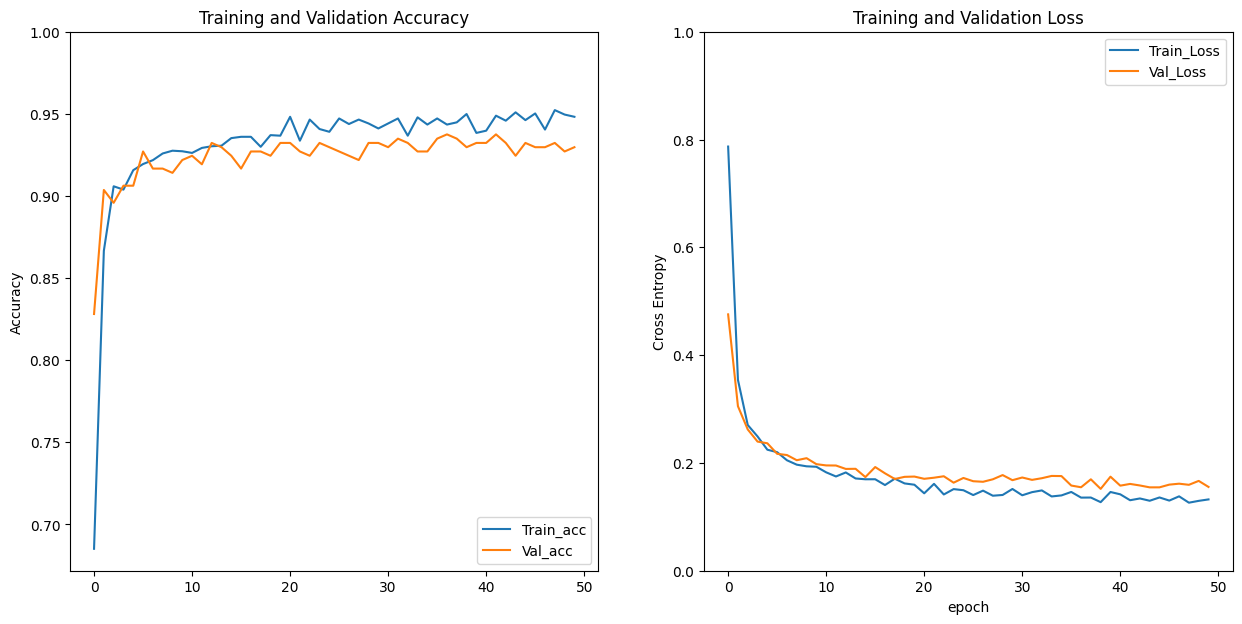

In [27]:
### Loss and accuracy plot
acc_mob = history_1.history['accuracy']
val_acc_mob = history_1.history['val_accuracy']

loss_mob = history_1.history['loss']
val_loss_mob = history_1.history['val_loss']

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(acc_mob, label='Train_acc')
plt.plot(val_acc_mob, label='Val_acc')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss_mob, label='Train_Loss')
plt.plot(val_loss_mob, label='Val_Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [28]:
result_eval = mobilenetv2_model.evaluate(val_gen, verbose =0)

for metric, eval in zip(mobilenetv2_model.metrics_names, result_eval):
  print(metric + ': {:.3}'.format(eval))

loss: 0.159
accuracy: 0.927


### **Model Evaluation with the test set**

In [29]:
## Import the test set
input_test = '/content/drive/MyDrive/dataset50/corndisease/PLANT_~2/test'
labels = os.listdir(input_test)
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_dims, img_dims)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [30]:
test_set_ = get_data(input_test)

## X and y test
X_test, y_test = [],[]
for feature, labels in test_set_:
  X_test.append(feature)
  y_test.append(labels)
## Convert the data in arrays
X_test = np.array(X_test) / 255
y_test = np.array(y_test)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (385, 2) + inhomogeneous part.

In [31]:
import numpy as np

def get_data(input_test, img_dims):
  """
  This function handles data in a robust way, ensuring consistency in shape.

  Args:
      data: A list or numpy array of data.
      img_dims: The desired image dimensions (for elements beyond 2D).

  Returns:
      A numpy array of the data, reshaped to img_dims if necessary.
  """
  if not isinstance(data, np.ndarray):
    data = np.array(data)

  # Ensure consistent shape after 2nd dimension (modify as needed)
  data = ensure_consistent_shape(data, img_dims)

  if len(data.shape) == 1:
    data = data.reshape(-1, img_dims[1])  # Reshape to 2D if 1D
  return data


In [32]:
import cv2
import os
import numpy as np
input_test = '/content/drive/MyDrive/Dataset_Corn/corndisease/PLANT_~2/test'
labels = os.listdir(input_test)

def get_data(data_dir, img_dims):
    data = []
    labels = os.listdir(data_dir)
    for label in labels:
        label_dir = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img_name in os.listdir(label_dir):
            try:
                img_path = os.path.join(label_dir, img_name)
                img_arr = cv2.imread(img_path)
                img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)  # convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_dims, img_dims))  # Resize images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
    return np.array(data, dtype=object)



In [33]:
test_set_ = get_data(input_test,img_dims)

## X and y test
X_test, y_test = [],[]
for feature, labels in test_set_:
  X_test.append(feature)
  y_test.append(labels)
## Convert the data in arrays
X_test = np.array(X_test) / 255
y_test = np.array(y_test)

In [34]:
## Prediction
y_pred = np.argmax(mobilenetv2_model.predict(X_test), axis = -1)

13/13 [==============================] - 1s 20ms/step


Accuracy: 0.94%


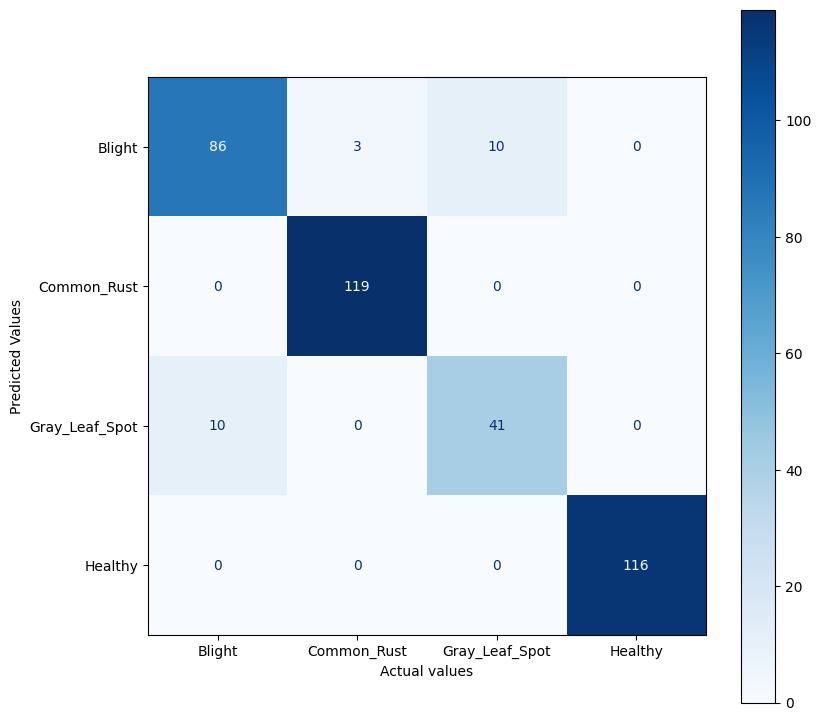

In [35]:
from sklearn.metrics import accuracy_score

#print("CONFUSION MATRIX ------------------------------")
fig, ax = plt.subplots(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues', ax = ax)
ax.set_xlabel("Actual values")
ax.set_ylabel("Predicted Values")
ax.xaxis.set_ticklabels(["Blight", "Common_Rust","Gray_Leaf_Spot", "Healthy"])
ax.yaxis.set_ticklabels(["Blight", "Common_Rust","Gray_Leaf_Spot", "Healthy"])

## Accuracy and F1-Score
acc_x = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(acc_x, 3)}%')

### **Final Observations**

- In general, the model reaches quite good performance with the test set, achieving an Accuracy of 94% .

- By analysing the Confusion Matrix, we can see that the model is so good at identifying Healthy leaf images (116 out of 116) and Common Rust leaf image ( 127 out of 129) with 100% and 98.44%  images correctly classified repeclty. On the other hand, the model with respect the other classes reached a performance aceptable, with 92.3% images correctly classified for Blight leaf  and 84.6% for Grey leaf spot.

### **Save the MobileNet model**

In [36]:
# Assuming you have your model defined as `mobilenetv2_model`

# Save model in HDF5 format
export_path = '/content/drive/MyDrive/dataset50/corndisease/save_model/model_mobnetv2.h5'
mobilenetv2_model.save(export_path)  # Save the model in HDF5 format
